In [1]:
%reload_ext autoreload
%autoreload 2

import numpy as np
import pandas as pd
from copy import deepcopy
import pyhf
import eos
import matplotlib.pyplot as plt
from redist import modifier
from redist import plot
import knunu_utils 
import ksnunu_utils 

# Combining $B \to K \nu \nu$ and $B \to K^* \nu \nu$ in terms of the WET

In [2]:
files       = ['knunu_model.json', 'ksnunu_model.json']
alt_dists   = [knunu_utils.alt_pred().distribution, ksnunu_utils.alt_pred().distribution]
null_dists  = [knunu_utils.null_pred().distribution, ksnunu_utils.null_pred().distribution]


model, data = modifier.combine(files, alt_dists, null_dists, return_data=True)

In [3]:
fixed = model.config.suggested_fixed()
fixed[model.config.par_map['mu']['slice']] = [True]

# for i in range(3, 19):
#     fixed[model.config.par_map[f'FFKs_decorrelated[{i}]']['slice']] = [True]

# for i in range(3, 8):
#     fixed[model.config.par_map[f'FFK_decorrelated[{i}]']['slice']] = [True]

pyhf.set_backend("numpy", pyhf.optimize.scipy_optimizer())
best_fit = pyhf.infer.mle.fit(data, model, fixed_params=fixed)
pyhf.set_backend("numpy", pyhf.optimize.minuit_optimizer(verbose=True, strategy=2))
best_fit, twice_nll, OptimizeResult = pyhf.infer.mle.fit(
    data,
    model,
    init_pars=best_fit.tolist(),
    fixed_params=fixed,
    return_uncertainties=True,
    return_fitted_val=True,
    return_result_obj=True
    )

best_fit_dict = modifier.par_dict(model, best_fit)
best_fit_dict


W MnPosDef Matrix forced pos-def by adding to diagonal 0.79154
W MnPosDef Matrix forced pos-def by adding to diagonal 0.0145767
W MnPosDef Matrix forced pos-def by adding to diagonal 0.0133757
W MnPosDef Matrix forced pos-def by adding to diagonal 0.0135634
W MnPosDef Matrix forced pos-def by adding to diagonal 0.0530572


{'cvl': array([8.83171244, 0.06290475]),
 'cvr': array([3.11327832, 0.08724438]),
 'csl': array([2.14142288, 0.19234219]),
 'csr': array([2.14078238, 0.19238035]),
 'ctl': array([4.97570027e+00, 4.19256290e-03]),
 'FFK_decorrelated[0]': array([0.01766997, 0.49837011]),
 'FFK_decorrelated[1]': array([-0.03164653,  0.63844905]),
 'FFK_decorrelated[2]': array([-0.00756077,  0.29180561]),
 'FFK_decorrelated[3]': array([0.01083593, 0.82314256]),
 'FFK_decorrelated[4]': array([-0.01121707,  0.80709736]),
 'FFK_decorrelated[5]': array([0.00265508, 0.43433027]),
 'FFK_decorrelated[6]': array([-0.00646384,  0.71518798]),
 'FFK_decorrelated[7]': array([-0.00407331,  0.80320076]),
 'mu': array([1., 0.]),
 'stat': [[0.9993396608367564, 0.0023979096143919576],
  [1.0025893143124844, 0.0019529531192924443],
  [1.0017104314316334, 0.0016870421469727948],
  [0.9961656601118687, 0.0016351451843371612],
  [0.9959813114652508, 0.0016917388581624282],
  [1.003383186606185, 0.0017882053391047315],
  [1.004

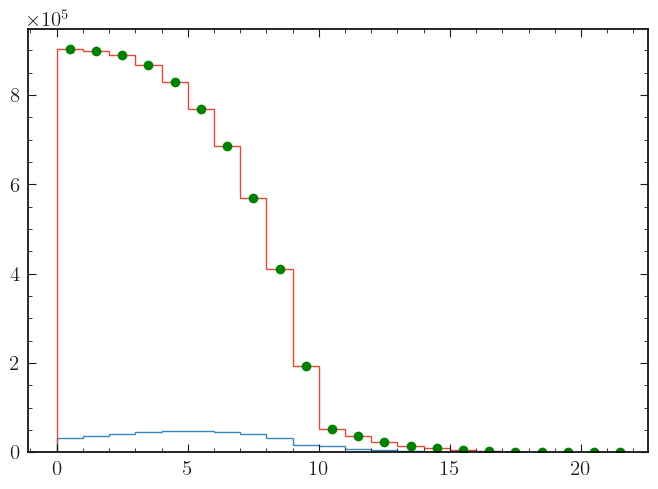

In [4]:
plt.stairs(model.expected_actualdata(model.config.suggested_init()))
plt.stairs(model.expected_actualdata(best_fit[:,0]))
x = np.linspace(0.5, 21.5, 22)
plt.plot(x, data[:22], 'og')